In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

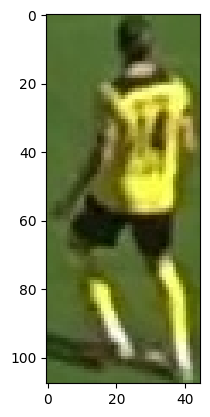

In [4]:
plt.imshow(image)
plt.show()

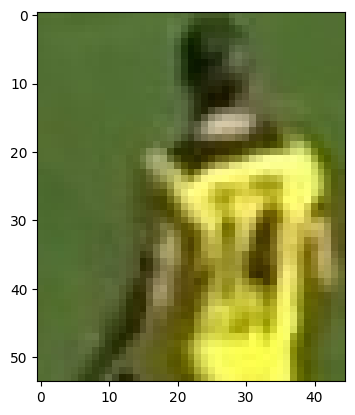

In [5]:
#take the top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

/Users/ari/GitHub/football-analysis/visionVENV/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ari/GitHub/football-analysis/visionVENV/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ari/GitHub/football-analysis/visionVENV/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ari/GitHub/football-analysis/visionVENV/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ari/GitHub/football-analysis/visionVENV/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ari/GitHub/football-analysis/visionVENV/lib/python3.13/site-packages/

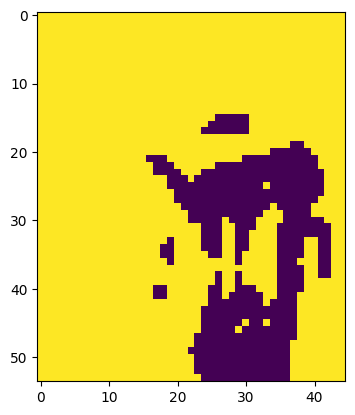

In [9]:
#cluster the colors of the image into two clusters

#1. reshape the image into a 2D array
image_2d = top_half_image.reshape(-1, 3)

#2. perform k-means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#3. Get the cluster labels
labels = kmeans.labels_

#4. reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#5. Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [10]:
#get the class for the corner pixels to identify the background class
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster]

array([212.24593496, 207.99186992,  86.1097561 ])